In [63]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [69]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

EVENT = {'INCOMING_CALL':0, 'OUTGOING_CALL':1, 'IDD_CALL':2, 'OUTGOING_SMS':4, 'INCOMING_SMS':5}

CDR from Timestamp('2014-10-01 00:00:13') to Timestamp('2015-03-31 23:59:59')

EVENT_TYPE  attributes   

'00' - Incoming Voice call   
'01' - Outgoing Voice call   
'02' - IDD Voice call   
'04' - SMS Outgoing (Duration=0)    
'05' - SMS Incoming (Duration=0)

Read in the cleaned_data.csv file 

In [48]:
infile = 'cleaned_data_2.csv'

# read in csv. Convert 'EVENT_DATE' column to Timestamp
raw_data = pd.read_csv(infile, sep='|', parse_dates=['EVENT_DATE']) 
raw_data['DURATION'] = pd.to_timedelta(raw_data['DURATION'])
raw_data

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
0,716124013,002122460381500710861980,5,2015-02-15 08:08:23,00:00:00,0.0
1,716124013,002122460381500710861980,5,2015-02-16 08:06:35,00:00:00,0.0
2,716124013,002122460381500710861980,5,2015-02-16 08:06:41,00:00:00,0.0
3,716124013,002122460381500710861980,5,2015-02-17 17:30:20,00:00:00,0.0
4,716124013,002122460381500710861980,5,2015-02-17 17:30:26,00:00:00,0.0
5,716124013,002122460381500710861980,5,2015-03-05 18:57:21,00:00:00,0.0
6,716124013,002122460381500710861980,5,2015-03-05 18:57:27,00:00:00,0.0
7,716124013,002122460381500710861980,5,2015-03-13 15:11:29,00:00:00,0.0
8,716124013,002122460381500710861980,5,2015-03-13 15:11:36,00:00:00,0.0
9,716124013,002122460381500710861980,5,2015-03-15 20:31:23,00:00:00,0.0


In [136]:
# raw_data[(raw_data['A_NUMBER']==716124013) 
#          & (raw_data['EVENT_TYPE']==5)].sort('EVENT_DATE')
raw_data[(raw_data['A_NUMBER']==716124013)].to_csv('716124013.csv')

In [51]:
group = raw_data.groupby('A_NUMBER')

def aggregations(x):
    first_recds = x['EVENT_DATE'].min()
    last_recds = x['EVENT_DATE'].max()
    total_recds = len(x)
    
    num_out_calls = len(x[x['EVENT_TYPE']==EVENT['OUTGOING_CALL']])
    out_duration = x[x['EVENT_TYPE']==EVENT['OUTGOING_CALL']]['DURATION'].sum()
    out_duration_sec = out_duration/np.timedelta64(1,'s')
    
    num_in_calls = len(x[x['EVENT_TYPE']==EVENT['INCOMING_CALL']])
    in_duration = x[x['EVENT_TYPE']==EVENT['INCOMING_CALL']]['DURATION'].sum()
    in_duration_sec = in_duration/np.timedelta64(1,'s')
    
    num_IDD_calls = len(x[x['EVENT_TYPE']==EVENT['IDD_CALL']])
    num_out_sms = len(x[x['EVENT_TYPE']==EVENT['OUTGOING_SMS']])
    num_in_sms = len(x[x['EVENT_TYPE']==EVENT['INCOMING_SMS']])
    
    return pd.Series([first_recds, 
                      last_recds, 
                      total_recds, 
                      
                      num_out_calls, 
                      out_duration,
                      out_duration_sec,
                      
                      num_in_calls, 
                      in_duration,
                      in_duration_sec,
                      
                      num_IDD_calls, 
                      num_out_sms, 
                      num_in_sms]
                      , index=['first recds', 'last recds', 'total records', 'num outgoing calls', 
                               'out duration', 'out duration in sec', 'num incoming calls', 'in duration',
                               'in duration in sec', 'num IDD calls',
                              'num outgoing sms', 'num incoming sms'])

summary = group.apply(aggregations) 

,first recds,last recds,total records,num outgoing calls,out duration,num incoming calls,in duration,num IDD calls,num outgoing sms,num incoming sms
A_NUMBER,,,,,,,,,,
710000810,2014-10-01 07:16:46,2015-03-31 19:23:17,3453,1004,0 days 19:30:22,1173,0 days 22:11:50,0,23,1253
710002560,2014-10-01 06:01:11,2015-03-31 23:50:08,3158,1499,3 days 06:00:51,456,0 days 10:00:42,0,294,909
710003902,2014-10-01 04:14:52,2015-03-31 22:12:31,3466,2095,4 days 23:24:44,972,1 days 05:43:38,0,4,395
710004420,2014-10-01 11:17:05,2015-03-31 20:05:40,2368,840,0 days 17:48:09,1069,0 days 16:28:57,0,25,434
710004816,2014-10-01 03:37:00,2015-03-31 13:15:26,3405,1642,4 days 01:57:12,1467,4 days 10:24:53,0,124,172
710005499,2014-10-01 09:43:43,2015-03-31 21:10:51,3317,1046,2 days 22:44:54,783,1 days 11:06:05,15,30,1443
710007474,2014-10-01 07:30:17,2015-03-31 20:00:37,3286,1567,2 days 01:22:24,1265,0 days 19:40:37,0,43,411
710008915,2015-02-18 18:01:59,2015-03-31 22:02:46,615,252,0 days 06:10:47,233,0 days 04:42:20,0,9,121
710008952,2014-10-01 08:02:57,2015-03-31 16:54:36,2825,1689,4 days 16:56:43,826,2 days 01:35:13,0,24,286


In [123]:
summary

,first recds,last recds,total records,num outgoing calls,out duration,num incoming calls,in duration,num IDD calls,num outgoing sms,num incoming sms,out duration sec,in duration sec
A_NUMBER,,,,,,,,,,,,
710000810,2014-10-01 07:16:46,2015-03-31 19:23:17,3453,1004,0 days 19:30:22,1173,0 days 22:11:50,0,23,1253,70222,79910
710002560,2014-10-01 06:01:11,2015-03-31 23:50:08,3158,1499,3 days 06:00:51,456,0 days 10:00:42,0,294,909,280851,36042
710003902,2014-10-01 04:14:52,2015-03-31 22:12:31,3466,2095,4 days 23:24:44,972,1 days 05:43:38,0,4,395,429884,107018
710004420,2014-10-01 11:17:05,2015-03-31 20:05:40,2368,840,0 days 17:48:09,1069,0 days 16:28:57,0,25,434,64089,59337
710004816,2014-10-01 03:37:00,2015-03-31 13:15:26,3405,1642,4 days 01:57:12,1467,4 days 10:24:53,0,124,172,352632,383093
710005499,2014-10-01 09:43:43,2015-03-31 21:10:51,3317,1046,2 days 22:44:54,783,1 days 11:06:05,15,30,1443,254694,126365
710007474,2014-10-01 07:30:17,2015-03-31 20:00:37,3286,1567,2 days 01:22:24,1265,0 days 19:40:37,0,43,411,177744,70837
710008915,2015-02-18 18:01:59,2015-03-31 22:02:46,615,252,0 days 06:10:47,233,0 days 04:42:20,0,9,121,22247,16940
710008952,2014-10-01 08:02:57,2015-03-31 16:54:36,2825,1689,4 days 16:56:43,826,2 days 01:35:13,0,24,286,406603,178513


In [100]:
summary['out duration sec'] = summary['out duration'] / np.timedelta64(1,'s')
summary['in duration sec'] = summary['in duration'] / np.timedelta64(1,'s')

In [60]:
# customers who churn. Note: discard this. This is too general
summary[summary['last recds']<dt.datetime(2015,3,1)]

,first recds,last recds,total records,num outgoing calls,out duration,num incoming calls,in duration,num IDD calls,num outgoing sms,num incoming sms
A_NUMBER,,,,,,,,,,
710358916,2014-10-18 11:46:07,2014-10-20 22:12:54,3,0,00:00:00,3,00:01:03,0,0,0
711070882,2014-10-13 20:07:43,2014-10-13 20:07:43,1,0,00:00:00,0,00:00:00,0,0,1
711318218,2015-02-06 21:38:53,2015-02-06 21:41:04,4,1,00:03:06,0,00:00:00,0,1,2
711865178,2014-10-02 13:42:14,2015-01-02 16:00:28,25,0,00:00:00,0,00:00:00,0,0,25
713432146,2014-10-02 15:41:16,2014-12-22 10:20:55,118,0,00:00:00,0,00:00:00,0,0,118
715372389,2014-10-25 16:31:18,2015-02-12 14:12:49,6,0,00:00:00,0,00:00:00,0,0,6
715716448,2014-10-22 14:50:21,2014-10-25 16:33:27,2,0,00:00:00,1,00:00:31,0,0,1
715993857,2014-11-10 09:02:59,2015-02-09 14:23:08,30,0,00:00:00,0,00:00:00,0,0,30
716374739,2014-10-01 06:27:58,2015-01-14 16:49:46,22,16,00:22:32,0,00:00:00,0,0,6


In [109]:
def churn_aggregator(x):
    last_call = x[x['EVENT_TYPE']==EVENT['OUTGOING_CALL']]['EVENT_DATE'].max()
    last_sms = x[x['EVENT_TYPE']==EVENT['OUTGOING_SMS']]['EVENT_DATE'].max()
    last_idd =  x[x['EVENT_TYPE']==EVENT['IDD_CALL']]['EVENT_DATE'].max()
    
    return pd.Series([last_call, last_sms, last_idd], index=['Last Outgoing Call', 'Last Outgoing SMS',
                                                            'Last Outgoing IDD Call'])

last_activity = group.apply(churn_aggregator)

In [118]:
churn = summary[last_activity.apply(lambda x: x.max(), axis=1)<dt.datetime(2015,2,1)]


In [119]:
churn

,first recds,last recds,total records,num outgoing calls,out duration,num incoming calls,in duration,num IDD calls,num outgoing sms,num incoming sms,out duration sec,in duration sec
A_NUMBER,,,,,,,,,,,,
710342559,2014-11-17 18:58:12,2015-03-31 18:46:28,134,1,0 days 00:13:40,0,00:00:00,0,0,133,820,0
710635376,2014-10-02 13:59:23,2015-03-23 16:36:17,69,0,0 days 00:00:00,2,00:00:36,0,1,66,0,36
711062439,2014-10-01 07:43:15,2015-03-31 12:21:04,205,0,0 days 00:00:00,0,00:00:00,0,6,199,0,0
711720844,2014-10-13 15:28:33,2015-03-30 12:26:05,61,0,0 days 00:00:00,6,00:16:09,0,3,52,0,969
711869409,2014-10-02 09:12:04,2015-03-30 16:21:08,180,0,0 days 00:00:00,0,00:00:00,0,5,175,0,0
711900130,2014-10-17 08:13:53,2015-03-28 13:23:19,59,0,0 days 00:00:00,1,00:00:13,0,1,57,0,13
713482745,2014-11-04 17:27:35,2015-03-17 21:02:37,50,0,0 days 00:00:00,0,00:00:00,0,4,46,0,0
713706024,2014-10-01 13:42:16,2015-03-31 14:41:20,226,0,0 days 00:00:00,4,00:03:03,1,0,221,0,183
713739298,2015-01-01 08:14:33,2015-03-27 07:12:16,77,2,0 days 00:04:43,1,00:00:21,0,0,74,283,21


In [102]:
summary.describe()

,total records,num outgoing calls,out duration,num incoming calls,in duration,num IDD calls,num outgoing sms,num incoming sms,out duration sec,in duration sec
count,7564.000000,7564.000000,7564,7564.000000,7564,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000
mean,2708.677419,1261.428609,2 days 00:24:05.156002,834.678477,1 days 03:43:03.023400,5.041380,133.297197,474.231756,174245.156002,99783.023400
std,1104.254958,609.293706,1 days 14:35:53.926498,480.860773,1 days 06:38:25.625312,29.555453,317.260181,432.050274,138953.926499,110305.625312
min,1.000000,0.000000,0 days 00:00:00,0.000000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2331.500000,903.750000,1 days 01:06:17.750000,514.000000,0 days 12:53:33.500000,0.000000,11.000000,223.000000,90377.750000,46413.500000
50%,2781.000000,1288.000000,1 days 17:26:41.500000,809.500000,0 days 21:59:30,0.000000,40.000000,367.000000,149201.500000,79170.000000
75%,3202.250000,1657.000000,2 days 16:31:33,1118.000000,1 days 09:57:48,1.000000,124.000000,580.000000,232293.000000,122268.000000
max,16563.000000,4704.000000,32 days 07:59:21,4191.000000,45 days 03:59:29,794.000000,6784.000000,7992.000000,2793561.000000,3902369.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x269eb7f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16489da90>]], dtype=object)

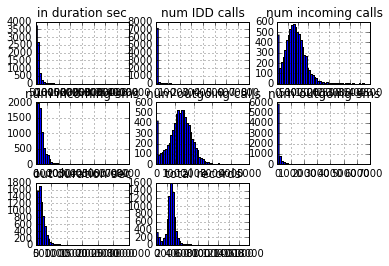

In [101]:
plt.figure()

summary.hist(bins=50)

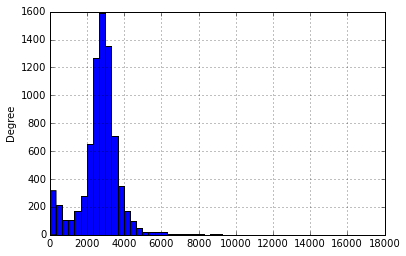

In [121]:
summary['total records'].plot(kind='hist', bins=50)

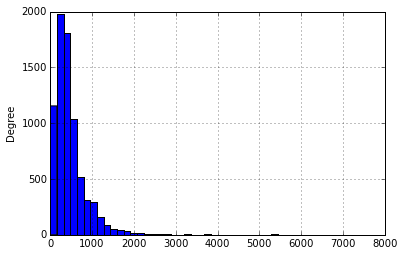

In [143]:
summary['num incoming sms'].plot(kind='hist', bins=50)

In [68]:
# Find data where B_NUMBER's length is more than 10
# cleaned_data[(cleaned_data['B_NUMBER'].str.len() > 20) & (cleaned_data['DURATION'].notnull())]

# Findings: when B_NUMBER's length is more than 20 digits (majority is 22 digits), Call Duration is unknown 
# and they are all incoming SMS (EVENT_TYPE=5). Hence 20-digits-and-above number maybe call centre

long_B_NUMBER = cleaned_data[(cleaned_data['B_NUMBER'].str.len() > 20) & (cleaned_data['EVENT_TYPE'] == 5)]
# np.unique(long_B_NUMBER[['B_NUMBER']].values)

# Findings: when B_NUMBER is more than 20 digits, it may be call centre

In [138]:
cleaned_data[cleaned_data['A_NUMBER']==716124013].to_csv("716124013_cleaneddata.csv")

In [5]:
# Finding: When EVENT_TYPE = 5 or 4, DURATION = NaN
# When EVENT_TYPE = 0 or 1, DURATION.notnull() == True
cleaned_data[(cleaned_data['EVENT_TYPE'] == EVENT['IDD Call']) & (cleaned_data['DURATION'].isnull())]

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST


In [74]:
cleaned_data[(cleaned_data['EVENT_TYPE']==EVENT['Outgoing Call']) & (cleaned_data['DURATION'].isnull())]

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST


In [76]:
incoming_call = cleaned_data[cleaned_data['EVENT_TYPE']==EVENT['Incoming Call']]
incoming_call

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
98,716124013,0710108518,0,03-FEB-15 09.25.29.000000 AM,00:00:22,0
99,716124013,0710108518,0,03-FEB-15 09.26.05.000000 AM,00:01:33,0
100,716124013,0710108518,0,09-FEB-15 08.02.03.000000 PM,00:07:00,0
101,716124013,0710108518,0,09-FEB-15 08.46.44.000000 PM,00:03:09,0
102,716124013,0710108518,0,10-FEB-15 06.27.28.000000 AM,00:01:08,0
103,716124013,0710108518,0,10-FEB-15 08.22.10.000000 AM,00:03:35,0
104,716124013,0710108518,0,10-FEB-15 08.58.01.000000 AM,00:02:48,0
105,716124013,0710108518,0,10-FEB-15 01.17.28.000000 PM,00:00:34,0
106,716124013,0710108518,0,10-FEB-15 01.20.30.000000 PM,00:12:37,0
107,716124013,0710108518,0,10-FEB-15 07.12.13.000000 PM,00:06:25,0


In [77]:
outgoing_call = cleaned_data[cleaned_data['EVENT_TYPE']==EVENT['Outgoing Call']]
outgoing_call

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
78,716124013,0372260301,1,15-MAR-15 07.01.26.000000 AM,00:00:25,2.0
79,716124013,0373612725,1,20-MAR-15 08.22.55.000000 AM,00:00:19,2.0
80,716124013,0373612725,1,20-MAR-15 04.23.49.000000 PM,00:00:21,2.0
81,716124013,0375615918,1,13-MAR-15 10.00.01.000000 AM,00:00:14,2.0
82,716124013,0375615918,1,15-MAR-15 06.13.57.000000 PM,00:00:36,2.0
83,716124013,0375615918,1,15-MAR-15 06.25.57.000000 PM,00:00:36,2.0
84,716124013,0375615918,1,29-MAR-15 05.44.34.000000 PM,00:00:12,2.0
457,716124013,0710108518,1,11-FEB-15 02.40.18.000000 PM,00:00:55,0.0
458,716124013,0710108518,1,11-FEB-15 09.09.55.000000 PM,00:03:25,0.0
459,716124013,0710108518,1,12-FEB-15 04.58.20.000000 PM,00:00:29,0.0


In [17]:
cleaned_data.sort('EVENT_DATE')

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
1793986,712219131,00947100307,5,01-DEC-14 01.00.00.000000 AM,NaN,0.0
8574509,715533607,0719131903,1,01-DEC-14 01.00.00.000000 PM,13,0.0
19663922,719410939,0776243461,0,01-DEC-14 01.00.00.000000 PM,2,0.0
15739306,713600457,0713916352,4,01-DEC-14 01.00.01.000000 AM,NaN,0.1
12144128,714387377,0717412775,0,01-DEC-14 01.00.02.000000 PM,289,0.0
4606544,712176087,0726986171,0,01-DEC-14 01.00.02.000000 PM,29,0.0
13164836,712260748,0712734502,5,01-DEC-14 01.00.03.000000 PM,NaN,0.0
19983967,715298360,0553560419,1,01-DEC-14 01.00.05.000000 PM,15,0.0
552765,714140890,0771531329,1,01-DEC-14 01.00.05.000000 PM,41,2.0
18212547,712919696,0362222307,1,01-DEC-14 01.00.05.000000 PM,32,0.0


In [16]:
temp = cleaned_data.head()
temp

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
0,716124013,002122460381500710861980,5,15-FEB-15 08.08.23.000000 AM,NaN,0
1,716124013,002122460381500710861980,5,16-FEB-15 08.06.35.000000 AM,NaN,0
2,716124013,002122460381500710861980,5,16-FEB-15 08.06.41.000000 AM,NaN,0
3,716124013,002122460381500710861980,5,17-FEB-15 05.30.20.000000 PM,NaN,0
4,716124013,002122460381500710861980,5,17-FEB-15 05.30.26.000000 PM,NaN,0


In [15]:
# temp['EVENT_DATE'] = pd.to_datetime(temp['EVENT_DATE'])
temp[temp['EVENT_DATE']>'2015-02-15']

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
1,716124013,002122460381500710861980,5,2015-02-16 00:00:00,NaN,0
2,716124013,002122460381500710861980,5,2015-02-16 00:00:00,NaN,0
3,716124013,002122460381500710861980,5,2015-02-17 12:00:00,NaN,0
4,716124013,002122460381500710861980,5,2015-02-17 12:00:00,NaN,0


In [ ]:
cleaned_data[cleaned_data['EVENT_DATE']==datetime.date(2015, 2, 23)]

Customer Statistics

In [82]:
cleaned_data.groupby('A_NUMBER').count()

,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
A_NUMBER,,,,,
710000810,3453,3453,3453,2177,3453
710002560,3158,3158,3158,1955,3158
710003902,3466,3466,3466,3067,3466
710004420,2368,2368,2368,1909,2368
710004816,3405,3405,3405,3109,3405
710005499,3317,3317,3317,1844,3317
710007474,3286,3286,3286,2832,3286
710008915,615,615,615,485,615
710008952,2825,2825,2825,2515,2825


In [ ]:
cleaned_data.sort('EVENT_DATE').head()

In [61]:
summary

,first recds,last recds,total records,num outgoing calls,out duration,num incoming calls,in duration,num IDD calls,num outgoing sms,num incoming sms
A_NUMBER,,,,,,,,,,
710000810,2014-10-01 07:16:46,2015-03-31 19:23:17,3453,1004,0 days 19:30:22,1173,0 days 22:11:50,0,23,1253
710002560,2014-10-01 06:01:11,2015-03-31 23:50:08,3158,1499,3 days 06:00:51,456,0 days 10:00:42,0,294,909
710003902,2014-10-01 04:14:52,2015-03-31 22:12:31,3466,2095,4 days 23:24:44,972,1 days 05:43:38,0,4,395
710004420,2014-10-01 11:17:05,2015-03-31 20:05:40,2368,840,0 days 17:48:09,1069,0 days 16:28:57,0,25,434
710004816,2014-10-01 03:37:00,2015-03-31 13:15:26,3405,1642,4 days 01:57:12,1467,4 days 10:24:53,0,124,172
710005499,2014-10-01 09:43:43,2015-03-31 21:10:51,3317,1046,2 days 22:44:54,783,1 days 11:06:05,15,30,1443
710007474,2014-10-01 07:30:17,2015-03-31 20:00:37,3286,1567,2 days 01:22:24,1265,0 days 19:40:37,0,43,411
710008915,2015-02-18 18:01:59,2015-03-31 22:02:46,615,252,0 days 06:10:47,233,0 days 04:42:20,0,9,121
710008952,2014-10-01 08:02:57,2015-03-31 16:54:36,2825,1689,4 days 16:56:43,826,2 days 01:35:13,0,24,286


In [139]:
len(raw_data.iloc[100]['B_NUMBER'])

10

In [141]:
raw_data[raw_data['B_NUMBER'].str.len() > 20]

,A_NUMBER,B_NUMBER,EVENT_TYPE,EVENT_DATE,DURATION,EVENT_COST
0,716124013,002122460381500710861980,5,2015-02-15 08:08:23,0 days,0
1,716124013,002122460381500710861980,5,2015-02-16 08:06:35,0 days,0
2,716124013,002122460381500710861980,5,2015-02-16 08:06:41,0 days,0
3,716124013,002122460381500710861980,5,2015-02-17 17:30:20,0 days,0
4,716124013,002122460381500710861980,5,2015-02-17 17:30:26,0 days,0
5,716124013,002122460381500710861980,5,2015-03-05 18:57:21,0 days,0
6,716124013,002122460381500710861980,5,2015-03-05 18:57:27,0 days,0
7,716124013,002122460381500710861980,5,2015-03-13 15:11:29,0 days,0
8,716124013,002122460381500710861980,5,2015-03-13 15:11:36,0 days,0
9,716124013,002122460381500710861980,5,2015-03-15 20:31:23,0 days,0
